In [13]:
!pip install google-play-scraper
!pip install wordcloud

In [14]:
import pandas as pd
from google_play_scraper import app, reviews,Sort
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
package = 'app.bpjs.mobile'

try:
    result = app(
        package,
        lang='id',
        country='id'
    )

    print("Nama Aplikasi:", result['title'])
    print("Deskripsi:", result['description'])
    print("Rating:", result['score'])
    print("Jumlah Review:", result['ratings'])
    print("Total Download:", result['installs'])
    print("Versi Terakhir:", result['version'])

except Exception as e:
    print("Terjadi kesalahan:", str(e))

Nama Aplikasi: Mobile JKN
Deskripsi: Pengembangan aplikasi BPJS Kesehatan Mobile merupakan wujud nyata dari komitmen BPJS Kesehatan dalam memberikan kemudahan akses dan pelayanan yang optimal bagi peserta. Melalui aplikasi ini, peserta dapat mengakses beragam terkait program Jaminan Kesehatan Nasional yang diselenggarakan oleh BPJS Kesehatan secara cepat dan mudah, dimanapun informasi dan kapanpun.

Beragam fitur yang dapat dimanfaatkan oleh peserta antara lain:

Info Program JKN
Menampilkan informasi seputar BPJS Kesehatan

Informasi Peserta
Mencari penyimpanan data melalui nomor kartu, NIK atau No Kartu Keluarga

Info Lokasi Faskes
Mencari dan menampilkan peta lokasi fasilitas kesehetan berdasarkan cabang dan lokasi terdekatnya

Info Iuran
informasi mengenai tagihan peserta

Info Akun Virtual
Mencari No Virtual Account peserta berdasarkan NIK
Pendaftaran Peserta Baru, mendaftarkan diri Anda sebagai Peserta Bukan Penerima Upah

Fitur BUGAR
memperoleh data Fitness dengan cara menghubun

In [ ]:
data_review = []
continuation_token = None
for _ in range(20):

    result, continuation_token = reviews(
        package,
        lang = 'id',
        country = 'id',
        sort = Sort.NEWEST,
        count = 1000,
        continuation_token = continuation_token
    )
    data_review.extend(result)

df = pd.DataFrame(data_review)

df.to_csv('data_review.csv', index=False, encoding='utf-8')

for review in result:
    print("Review ID:", review['reviewId'])
    print("Username:", review['userName'])
    print("Skor:", review['score'])
    print("Tanggal:", review['at'])
    print("Komentar:", review['content'])
    print("---")
print("Continuation Token:", continuation_token)

Output streaming akan dipotong hingga 5000 baris terakhir.
---
Review ID: b00f8290-d015-43bf-a6c2-a4f7631c9ea0
Username: Ahmad Nur rozuki
Skor: 5
Tanggal: 2024-10-21 16:28:39
Komentar: Bagus
---
Review ID: 815227ee-b95f-4886-b87b-73e820040e88
Username: Ferdy Tanto
Skor: 4
Tanggal: 2024-10-21 15:49:27
Komentar: Sdh lebih baik tp msh agak ribet
---
Review ID: 8e3205d3-a407-4b45-8e2c-f202e2c5fc95
Username: Suhastuti Tuti
Skor: 5
Tanggal: 2024-10-21 15:17:31
Komentar: Tetap lebih baik
---
Review ID: 19b398f5-2cde-4491-bd5e-d7267cacb15d
Username: Aldi Andreansyah
Skor: 1
Tanggal: 2024-10-21 15:06:59
Komentar: Ribet amat
---
Review ID: d65dad30-9888-4085-af6b-a6d72bb0b525
Username: Roy M mh
Skor: 5
Tanggal: 2024-10-21 15:00:11
Komentar: josss..
---
Review ID: 73418c4d-9d1f-437e-8c45-65c09ec30557
Username: Suwanto W
Skor: 5
Tanggal: 2024-10-21 14:35:22
Komentar: mobil jkn gimana ini
---
Review ID: 7851c069-a486-4f72-bd4c-04abb913808e
Username: Rahmat Murtaja
Skor: 1
Tanggal: 2024-10-21 14:35:

In [17]:
df.sample(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
5376,0ffdd34d-cd8b-44e2-95f3-55991a845e99,NAGITA MAURA SLAVINA,https://play-lh.googleusercontent.com/a-/ALV-U...,Tolong dong pihak jkn apkny dperbaiki... Asal ...,1,0,None,2025-01-02 04:20:10,None,NaT,None
15355,ff4dc63a-34dc-43b8-87fc-14d04399c3bc,Roni siahaan,https://play-lh.googleusercontent.com/a/ACg8oc...,Tetap percaya ini yang terbaik buaf bantu kese...,5,0,4.9.0,2024-11-11 01:39:21,"""Hai…Terima kasih atas review dan rating yang ...",2022-10-03 22:20:47,4.9.0
15158,8fe46b11-772c-4a48-9989-ff497ac906b4,Mulyanto Carseemoon,https://play-lh.googleusercontent.com/a-/ALV-U...,Sangat membantu diera serba digital saat ini,5,0,4.9.0,2024-11-11 23:09:59,None,NaT,4.9.0


## Labeling

In [18]:
df = df[['content']]

df.sample(3)

,content
322,"jelek banget, otp sms ga ke kirim kirim"
6134,Sangat membantu dan memudahkan untuk kita bero...
3398,Mntap


In [19]:
df.isna().sum()

,0
content,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [ ]:
tokenizer = BertTokenizer.from_pretrained("afbudiman/indobert-classification")


def preprocess_text(texts, tokenizer, max_len=128):
    
    encoded_input = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_len,
        return_tensors="pt"
    )
    return encoded_input


In [ ]:
from transformers import BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained(
    "afbudiman/indobert-classification",
    num_labels=3  # Positif, Netral, Negatif
)

model.eval()

def predict_sentiment(texts, tokenizer, model):
    inputs = preprocess_text(texts, tokenizer)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1) 

    labels_map = {2: "Negatif", 1: "Netral", 0: "Positif"}
    predicted_labels = [labels_map[label.item()] for label in predictions]

    return predicted_labels


In [ ]:
texts = df["content"].tolist()

predicted_labels = predict_sentiment(texts, tokenizer, model)

df["sentiment"] = predicted_labels

print(df.head())


                           content sentiment
0                          Praktis   Positif
1  Mantaplah mempermudah fasilitas   Positif
2                               Ok   Positif
3                               Ok   Positif
4                             Good   Positif


In [24]:
df.to_csv('data_labeled.csv', index=False, encoding='utf-8')

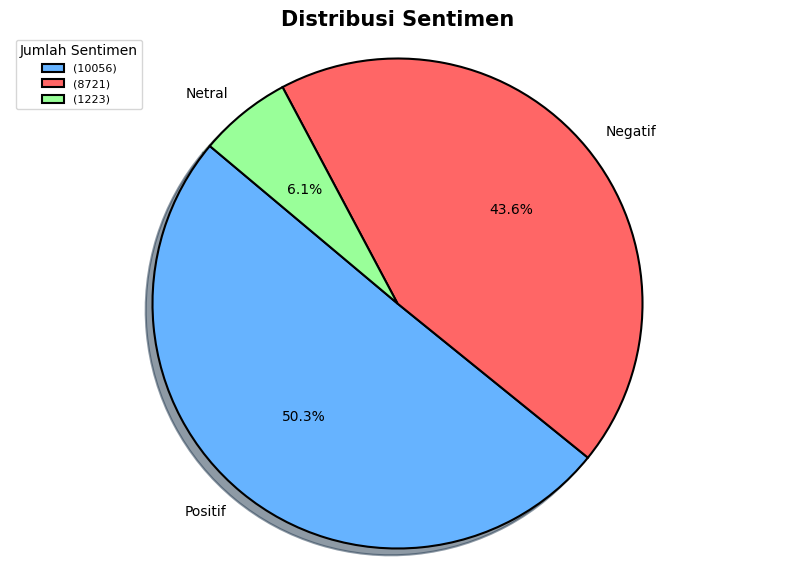

In [25]:
sentiment_counts = df['sentiment'].value_counts()

colors = ['#66b3ff', '#ff6666', '#99ff99']

plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=140,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},
        shadow=True)

plt.title('Distribusi Sentimen', fontsize=15, fontweight='bold')

legend_labels = [f"({count})" for count in sentiment_counts]

plt.legend(legend_labels, title="Jumlah Sentimen", loc="upper left", fontsize=8, frameon=True)


plt.axis('equal')
plt.show()

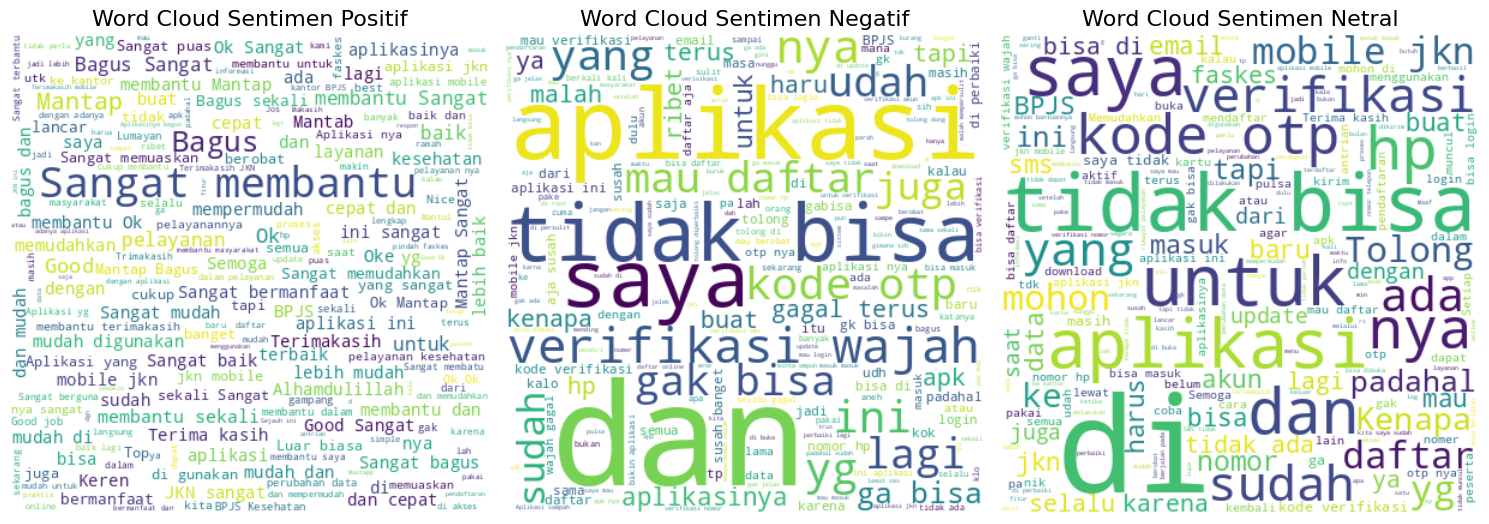

In [30]:
df['content'] = df['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

positive_text = ' '.join(df[df['sentiment'] == 'Positif']['content'])
negative_text = ' '.join(df[df['sentiment'] == 'Negatif']['content'])
netral_text = ' '.join(df[df['sentiment'] == 'Netral']['content'])
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
wordcloud_pos = WordCloud(width=400, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud Sentimen Positif', fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 2)
wordcloud_neg = WordCloud(width=400, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud Sentimen Negatif', fontsize=16)
plt.axis('off')

plt.subplot(1, 3, 3)
wordcloud_neg = WordCloud(width=400, height=400, background_color='white').generate(netral_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud Sentimen Netral', fontsize=16)
plt.axis('off')


plt.tight_layout()
plt.show()
